In [1]:
import cv2
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models, layers, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [2]:
def load_data():

    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

    x_train = x_train[:10000]
    y_train = y_train[:10000]
    x_test = x_test[:1500]
    y_test = y_test[:1500]

    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15)

    label_as_binary = LabelBinarizer()
    y_test = label_as_binary.fit_transform(y_test)
    y_train = label_as_binary.fit_transform(y_train)
    y_val = label_as_binary.fit_transform(y_val)
    
    # normalization for train set
    x_train = x_train.astype(np.float32)
    for i in range(len(x_train)):
        x_train[i] = x_train[i] / 255
        
    # normalization for test set
    x_test = x_test.astype(np.float32)
    for i in range(len(x_test)):
        x_test[i] = x_test[i] / 255

    # normalization for val set
    x_val = x_val.astype(np.float32)
    for i in range(len(x_val)):
        x_val[i] = x_val[i] / 255

    print(x_train.shape)
    print(y_train.shape)
    print(x_val.shape)
    print(y_val.shape)
    print(x_test.shape)
    print(y_test.shape)

    # DATASET --> 8500 + 1500 + 1500 --> 11500
    # train --> 8500/11500 * 100 --> %74
    # validasyon --> 1500/11500 * 100 --> %13
    # test --> 1500/11500 * 100 --> %13

    return (x_train, y_train, x_val, y_val, x_test, y_test)

In [3]:
x_train, y_train, x_val, y_val, x_test, y_test = load_data()

(8500, 32, 32, 3)
(8500, 10)
(1500, 32, 32, 3)
(1500, 10)
(1500, 32, 32, 3)
(1500, 10)


In [4]:
model = models.Sequential()

input = (32,32,3)
num_class = 10

#Evrişim Katmanları
model.add(layers.Conv2D(128,kernel_size=(3,3), input_shape=input, activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(256, kernel_size=(3,3), activation="relu"))
model.add(layers.Flatten())

#Sınıflandırma Katmanları
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(num_class, activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 256)         590080    
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [6]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

In [7]:
epoch = 18
model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=epoch, batch_size=1024)

Epoch 1/18
9/9 [==============================] - 71s 8s/step - loss: 2.3120 - accuracy: 0.1175 - val_loss: 2.2519 - val_accuracy: 0.1493
Epoch 2/18
9/9 [==============================] - 64s 7s/step - loss: 2.1986 - accuracy: 0.1871 - val_loss: 1.9871 - val_accuracy: 0.2780
Epoch 3/18
9/9 [==============================] - 64s 7s/step - loss: 1.9962 - accuracy: 0.2619 - val_loss: 1.8639 - val_accuracy: 0.3167
Epoch 4/18
9/9 [==============================] - 65s 7s/step - loss: 1.8657 - accuracy: 0.3086 - val_loss: 1.7629 - val_accuracy: 0.3407
Epoch 5/18
9/9 [==============================] - 65s 7s/step - loss: 1.7769 - accuracy: 0.3396 - val_loss: 1.7120 - val_accuracy: 0.3647
Epoch 6/18
9/9 [==============================] - 65s 7s/step - loss: 1.7285 - accuracy: 0.3618 - val_loss: 1.6491 - val_accuracy: 0.3893
Epoch 7/18
9/9 [==============================] - 65s 7s/step - loss: 1.6394 - accuracy: 0.3895 - val_loss: 1.5925 - val_accuracy: 0.4080
Epoch 8/18
9/9 [==================

266/266 [==============================] - 15s 58ms/step - loss: 1.0477 - accuracy: 0.6304
Eğitim Doğruluğu: % 63.03529143333435
47/47 [==============================] - 3s 60ms/step - loss: 1.2150 - accuracy: 0.5560
Test Doğruluğu: % 55.59999942779541


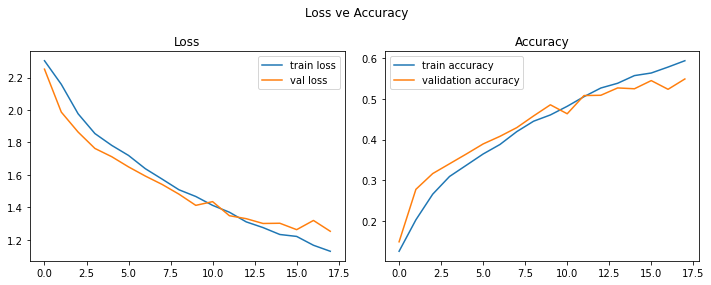

In [8]:
def evaluate_model(model):
    metrics = model.history.history
    
    fig,axes = plt.subplots(1,2, figsize=(10,4))
    fig.suptitle("Loss ve Accuracy")

    axes[0].plot(metrics["loss"], label="train loss")
    axes[0].plot(metrics["val_loss"], label="val loss")
    axes[0].set_title("Loss")
    axes[0].legend()
    axes[1].plot(metrics["accuracy"], label="train accuracy")
    axes[1].plot(metrics["val_accuracy"], label="validation accuracy")
    axes[1].set_title("Accuracy")
    axes[1].legend()
    plt.tight_layout()
    plt.legend()

    score_train = model.evaluate(x_train,y_train)
    print("Eğitim Doğruluğu: %",score_train[1]*100)
    score_test = model.evaluate(x_test,y_test)
    print("Test Doğruluğu: %",score_test[1]*100)
    
evaluate_model(model)

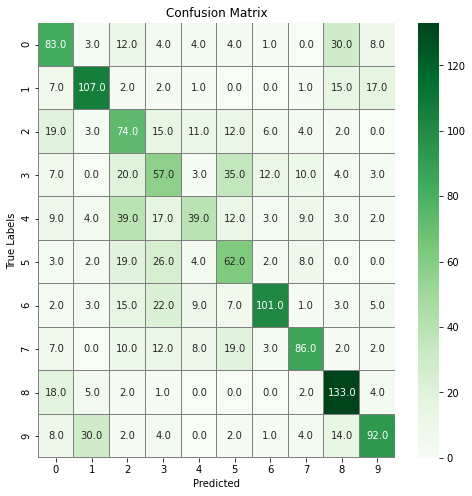

In [9]:
def get_confusion_matrix(model, x_test, y_test):
    
    y_predict = model.predict(x_test)
    y_predict_class = np.argmax(y_predict, axis = 1)
    Y_true = np.argmax(y_test, axis = 1)
    cm = confusion_matrix(Y_true, y_predict_class)

    fig, axes = plt.subplots(figsize=(8,8))
    sbn.heatmap(cm, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=axes)
    plt.xlabel("Predicted")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")

get_confusion_matrix(model, x_test, y_test)

In [10]:
def get_classification_metrics(model, x_test, y_test):

    y_predict = model.predict(x_test)
    y_predict_class = np.argmax(y_predict, axis = 1)
    Y_true = np.argmax(y_test, axis = 1)
    report = classification_report(Y_true, y_predict_class)
    print(report)

get_classification_metrics(model, x_test, y_test)

              precision    recall  f1-score   support

           0       0.51      0.56      0.53       149
           1       0.68      0.70      0.69       152
           2       0.38      0.51      0.43       146
           3       0.36      0.38      0.37       151
           4       0.49      0.28      0.36       137
           5       0.41      0.49      0.44       126
           6       0.78      0.60      0.68       168
           7       0.69      0.58      0.63       149
           8       0.65      0.81      0.72       165
           9       0.69      0.59      0.63       157

    accuracy                           0.56      1500
   macro avg       0.56      0.55      0.55      1500
weighted avg       0.57      0.56      0.56      1500



In [11]:
def get_class_name(class_no):

    if class_no == 0:
        name = "airplane"
    if class_no == 1:
        name = "automobile"
    if class_no == 2:
        name = "bird"
    if class_no == 3:
        name = "cat"
    if class_no == 4:
        name = "deer"
    if class_no == 5:
        name = "dog"
    if class_no == 6:
        name = "frog"
    if class_no == 7:
        name = "horse"
    if class_no == 8:
        name = "ship"
    if class_no == 9:
        name = "truck"
    
    return name

class --> dog
confidence --> 0.37101603


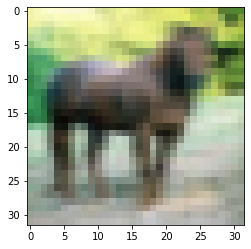

In [16]:
def predict_random_image(no):

    plt.imshow(x_test[no])

    image = x_test[no].reshape((1,32,32,3))
    predictions = model.predict(image)

    confidence = predictions.max()
    class_no = np.argmax(predictions)

    print("class -->", get_class_name(class_no))
    print("confidence -->", confidence)

predict_random_image(220)